In [1]:
import pandas as pd
import numpy as np

import textwrap

import matplotlib
import matplotlib.pyplot as plt

In [2]:
metrics = pd.read_csv('performanceMetrics.csv')

In [3]:
metrics.head(11)

,PlanningAlgorithm,mapName,numberOfCellsVisited,maximumLengthOfQueue,totalAngleTurned,pathTravelCost,pathCardinality
0,Breadth First (FIFO),empty,2917,109,180.917143,71.218336,46
1,Depth First (LIFO),empty,4255,1648,459.235116,359.090101,256
2,Greedy Planner,empty,180,136,268.531199,60.020456,46
3,Dijkstra's,empty,2980,150,226.048738,60.020456,46
4,A* Algorithm (Heuristic: 0),empty,2980,150,226.048738,60.020456,46
5,A* Algorithm (Heuristic: Euclidean),empty,1047,220,243.901398,60.020456,46
6,A* Algorithm (Heuristic: Octile),empty,945,203,226.048738,60.020456,46
7,A* Algorithm (Heuristic: Manhattan),empty,300,205,268.531199,60.020456,46
8,A* Algorithm (Heuristic: Constant = 20),empty,2980,149,226.048738,60.020456,46
9,A* Algorithm (Heuristic: Constant = 5),empty,2980,149,226.048738,60.020456,46


In [4]:
def plot_grouped_bar_graph(data, metric_col,  
                           title=None,y_label=None,
                           savefig=False, filename = None):
    # List of Planning algorithms
    planning_algorithms=['Breadth First (FIFO)','Depth First (LIFO)','Dijkstra\'s',
                         'A* Algorithm (Heuristic: Constant = 5)', 'A* Algorithm (Heuristic: Euclidean)',
                         'A* Algorithm (Heuristic: Octile)', 'A* Algorithm (Heuristic: Manhattan)']

    # Determine plot data and associated parameters
    label_name=data['mapName'].unique()
    n_maps=len(label_name)

    bar_data=[]
    for map_name in label_name:
        alg_data=[]
        for algorithm in planning_algorithms:
            alg_data.append(data[(data['PlanningAlgorithm']==algorithm) & (data['mapName']==map_name)][metric_col].to_list()[0])
        bar_data.append(np.array(alg_data))

    # Define x tick locations
    x = np.arange(len(planning_algorithms)) 
    # Set width of the bar plot
    width = 0.8/n_maps 

    # Plot the bar graph
    fig, ax = plt.subplots(figsize=(15,10))
    if (n_maps%2==0):
        for i in range(n_maps//2):
            ax.bar(x - (2*i+1)*width/2, bar_data[n_maps//2 - (i+1)], width, label=label_name[n_maps//2 - (i+1)])
            ax.bar(x + (2*i+1)*width/2, bar_data[n_maps//2 + i], width, label=label_name[n_maps//2 + i])
    else:
        ax.bar(x, bar_data[n_maps//2], width,label=label_name[n_maps//2])
        for i in range(n_maps//2):
            ax.bar(x - (i+1)*width, bar_data[n_maps//2 - (i+1)], width,label=label_name[n_maps//2 - (i+1)])
            ax.bar(x + (i+1)*width, bar_data[n_maps//2 + i], width,label=label_name[n_maps//2 + i])
            
    # Check if title was passed
    if title is None:
        title = metric_col + ' for each algorithm'
    if y_label is None:
        y_label = metric_col

    # Add title, axis labels and tick labels
    ax.set_ylabel(y_label)
    ax.set_ylabel('Algorithms')
    ax.set_title(title)
    ax.set_xticks(x)
    planning_algorithms=[textwrap.fill(name,22) for name in planning_algorithms]
    ax.set_xticklabels(planning_algorithms)
    ax.legend()

    # If savefig is True,  save the figure
    if savefig:
        if filename is None:
            filename = title + '.png'
        plt.savefig(filename)

    fig.tight_layout()
    plt.show()


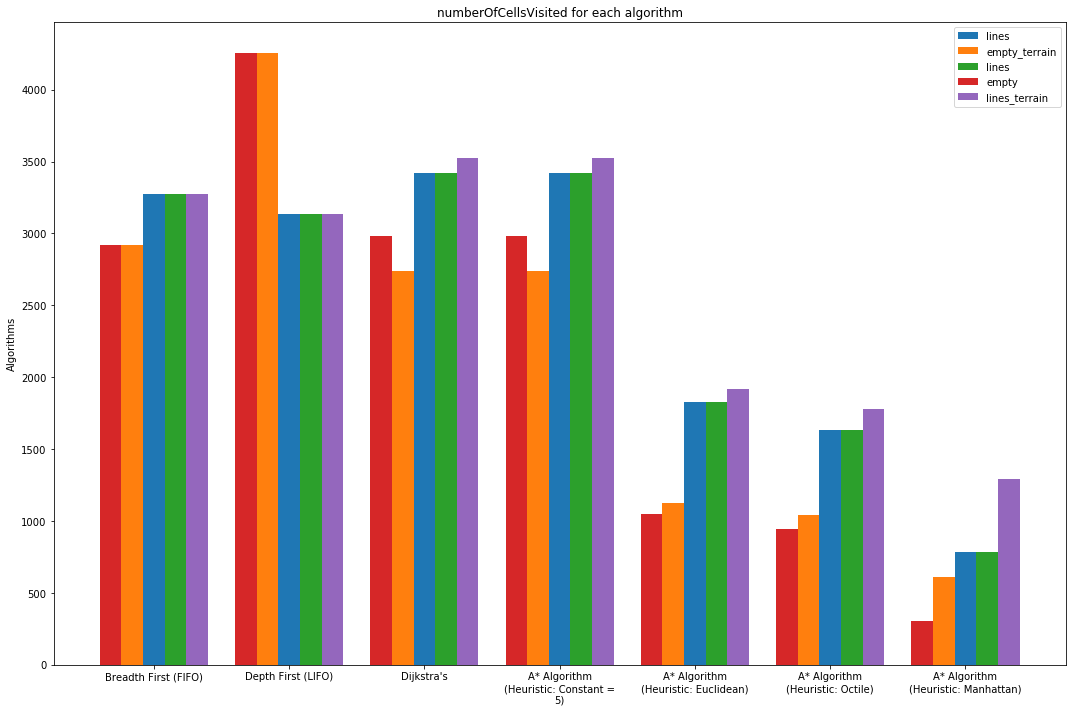

In [5]:
# numberOfCellsVisited
plot_grouped_bar_graph(metrics, 'numberOfCellsVisited')

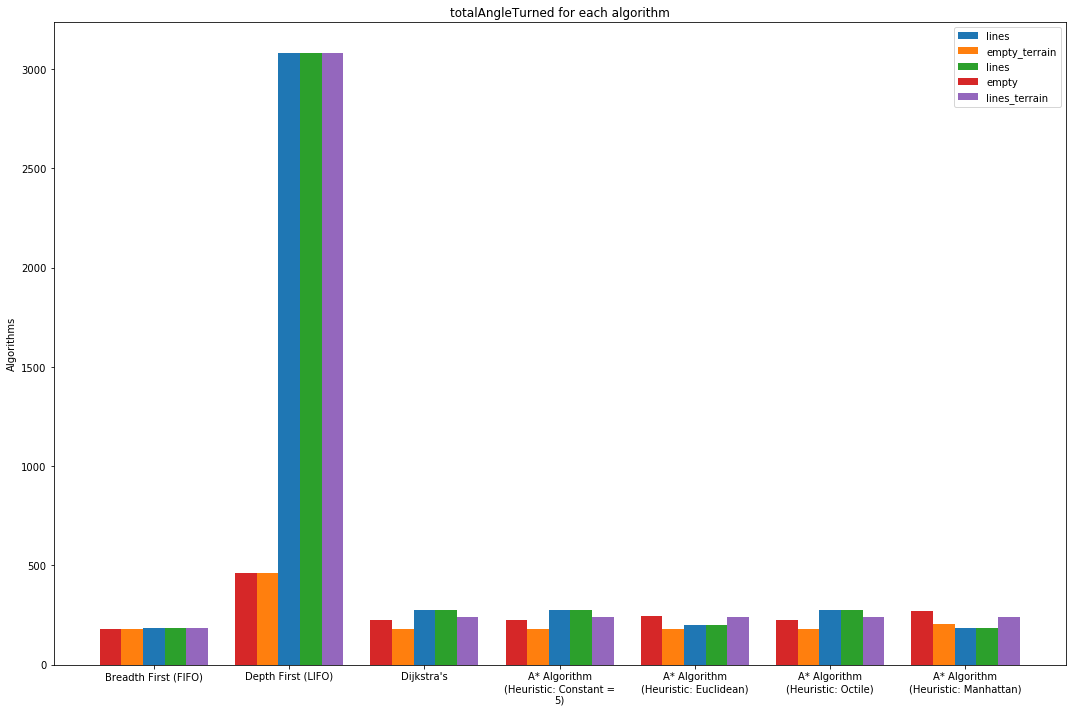

In [6]:
# totalAngleTurned
plot_grouped_bar_graph(metrics, 'totalAngleTurned')

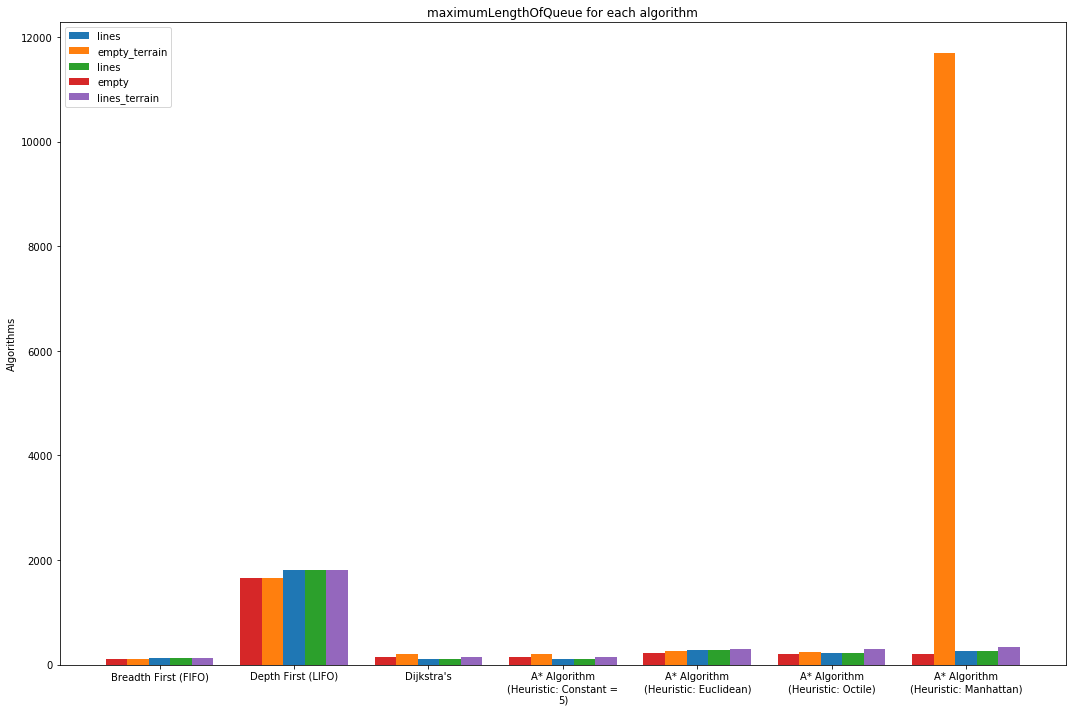

In [7]:
# maximumLengthOfQueue
plot_grouped_bar_graph(metrics, 'maximumLengthOfQueue')

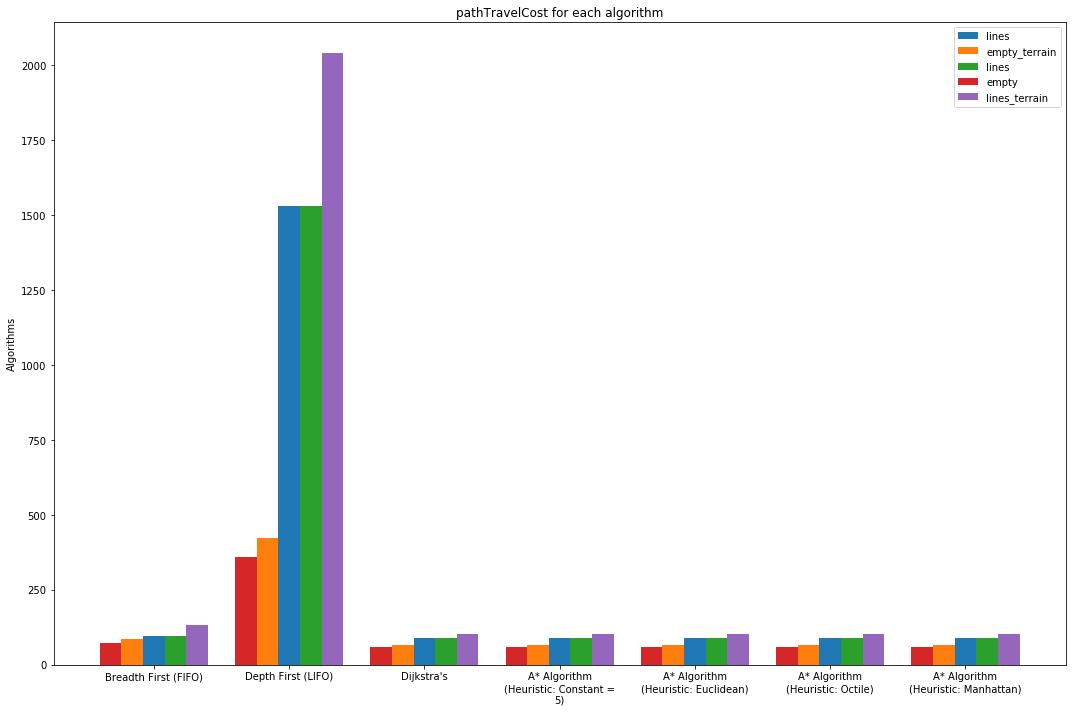

In [8]:
# pathTravelCost
plot_grouped_bar_graph(metrics, 'pathTravelCost')

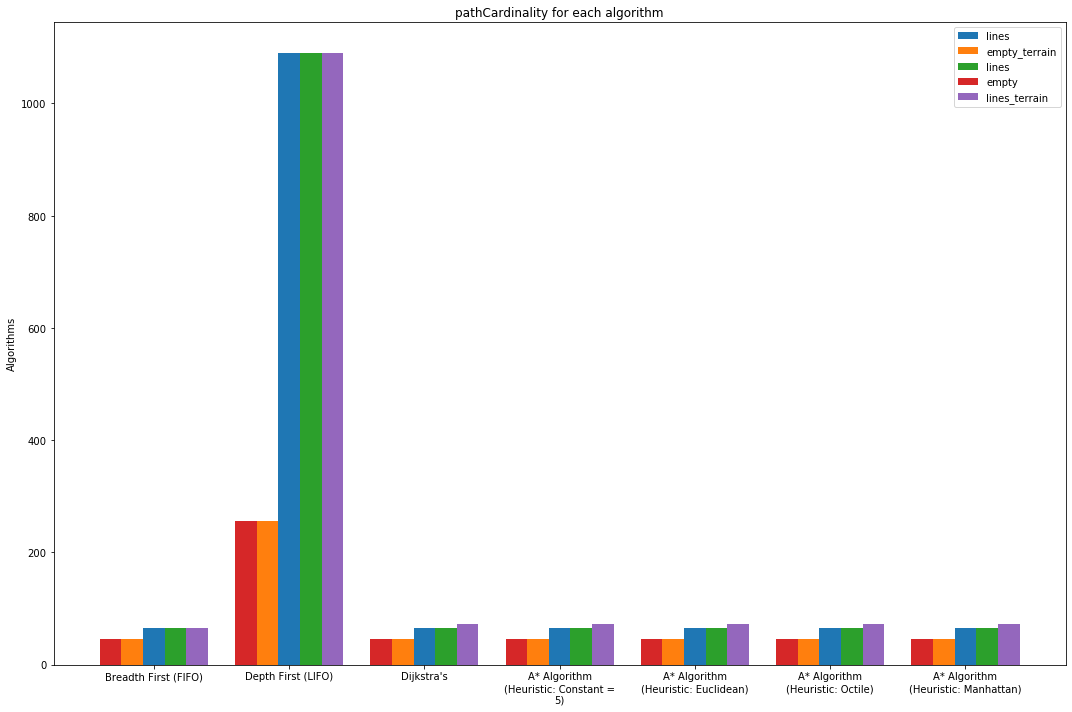

In [9]:
# pathCardinality
plot_grouped_bar_graph(metrics, 'pathCardinality')